# 개체 감지

*개체 감지*는 이미지에서 개별 개체 인스턴스를 분류하고 해당 위치를 나타내는 *경계 상자*를 표시하도록 기계 학습 모델이 학습된 Computer Vision 형태입니다. *이미지 분류*("무엇에 대한 이미지인가?"라는 질문에 답변하는 모델)가 진화하여 "이 이미지에 어떤 개체가 어디에 있는가?"를 모델에 물어볼 수 있는 솔루션으로 발전한 것이라 생각하면 됩니다.

![과일을 식별하는 로봇](./images/object-detection.jpg)

예를 들어 식료품점은 개체 감지 모델을 사용함으로써 카메라를 통해 컨베이어 벨트를 스캔하는 자동 계산 시스템을 구현할 수 있으며, 각 품목을 벨트에 놓고 따로 스캔할 필요 없이 특정 품목을 식별할 수 있습니다.

Microsoft Azure의 **Custom Vision** Cognitive Service는 사용자 지정 개체 감지 모델을 만들고 게시하기 위한 클라우드 기반 솔루션을 제공합니다.

## Custom Vision 리소스 만들기

Custom Vision 서비스를 사용하려면 모델을 학습시키는 데 사용할 수 있는 Azure 리소스 그리고 애플리케이션에서 사용하도록 모델을 게시할 수 있는 리소스가 필요합니다. 이러한 각 작업에 동일한 리소스를 사용하거나, 두 리소스가 동일한 영역에서 생성된 경우 각각에 대해 다른 리소스를 사용하여 비용을 따로 할당할 수 있습니다. 두 작업 중 하나 또는 둘 다에 사용되는 리소스는 일반 **Cognitive Services** 리소스일 수도 있고, 특정 **Custom Vision** 리소스일 수도 있습니다. 다음 지침을 따라 새로운 **Custom Vision** 리소스를 만듭니다(기존 리소스가 있으면 이를 사용할 수도 있음).

1. 새 브라우저 탭에서 Azure Portal([https://portal.azure.com](https://portal.azure.com)) 을 열고, Azure 구독과 연결된 Microsoft 계정을 사용하여 로그인합니다.
2. **&#65291;리소스 만들기** 단추를 선택하고, *Custom Vision*을 검색하고, 다음 설정을 사용하여 **Custom Vision** 리소스를 만듭니다.
    - **옵션 만들기**: 모두
    - **구독**: *사용자의 Azure 구독*
    - **리소스 그룹**: *고유한 이름의 새 리소스 그룹 선택 또는 만들기*
    - **이름**: *고유한 이름 입력*
    - **학습 위치**: *사용 가능한 지역 선택*
    - **학습 가격 책정 계층**: F0
    - **예측 위치**: *학습 위치와 동일*
    - **예측 가격 책정 계층**: F0

    > **참고**: 구독에 F0 Custom Vision 서비스가 이미 있는 경우에는 해당 서비스에 대해 **S0**을 선택합니다.

3. 리소스가 생성될 때까지 기다립니다.

## Custom Vision 프로젝트 만들기

개체 감지 모델을 학습시키기 위해 학습 리소스를 기반으로 Custom Vision 프로젝트를 만들어야 합니다. 이를 위해 Custom Vision 포털을 사용합니다.

1. 새 브라우저 탭에서 Custom Vision Portal([https://customvision.ai](https://customvision.ai)) 을 열고, Azure 구독과 연결된 Microsoft 계정을 사용하여 로그인합니다.
2. 다음 설정을 사용하여 새 프로젝트를 만듭니다.
    - **이름**: Grocery Detection
    - **설명**: 식료품을 위한 개체 감지.
    - **리소스**: *앞서 만든 Custom Vision 리소스*
    - **프로젝트 유형**: 개체 감지
    - **도메인**: 일반
3. 프로젝트가 생성되고 브라우저에서 열릴 때까지 기다립니다.

## 이미지 추가 및 태깅

개체 감지 모델을 학습시키려면 모델이 식별하도록 할 클래스가 포함된 이미지를 업로드하고, 각 개체 인스턴스의 경계 상자를 나타내도록 태깅해야 합니다.

1. https://aka.ms/fruit-objects에서 학습 이미지를 다운로드하고 압축 해제합니다. 압축 해제된 폴더에는 과일 이미지 모음이 들어 있습니다. **참고:** 임시 해결 방법으로는 학습 이미지에 액세스할 수 없는 경우 https://www.github.com으로 이동한 다음 https://aka.ms/fruit-objects로 이동합니다. 
2. 사용자 지정 Vision 포털([https://customvision.ai](https://customvision.ai))에서는 개체 감지 프로젝트 _Grocery Detection_에서 작업하고 있는지 확인합니다. **이미지 추가**를 선택하고 압축을 해제한 폴더의 모든 이미지를 업로드합니다.

![이미지 추가를 클릭하여 다운로드한 이미지를 업로드합니다.](./images/fruit-upload.jpg)

3. 이미지를 업로드한 후에는 첫 번째 이미지를 선택하여 엽니다.
4. 아래 이미지와 같이 자동으로 감지된 영역이 표시될 때까지 이미지 안의 개체 위에 마우스를 올려 놓습니다. 그런 다음에 개체를 선택하고, 필요하면 주변을 둘러싸도록 영역 크기를 조정합니다.

![개체의 기본 영역](./images/object-region.jpg)

또는 간단히 개체를 끌어서 영역을 만들 수 있습니다.

5. 영역이 개체를 둘러싸게 되면 여기에 나온 것처럼 적절한 개체 유형의 새로운 태그(*apple*, *banana* 또는 *orange*)를 추가합니다.

![이미지에서 태깅된 개체](./images/object-tag.jpg)

6. 이미지에서 각 개체를 선택하고 태깅하고, 필요에 따라 영역 크기를 조정하고 새로운 태그를 추가합니다.

![이미지에서 태깅된 두 개의 개체](./images/object-tags.jpg)

7. 오른쪽의 **>** 링크를 사용하여 다음 이미지로 이동하고 해당 개체를 태깅합니다. 이런 식으로 전체 이미지 모음이 완료될 때까지 진행하면서 각각의 사과, 바나나, 오렌지를 태깅합니다.

8. 마지막 이미지의 태깅을 마쳤으면 **이미지 세부 사항** 편집기를 닫고 **학습 이미지** 페이지의 **태그** 아래에서 **태깅됨**을 선택하여 태깅된 모든 이미지를 표시합니다.

![프로젝트 내의 태깅된 이미지](./images/tagged-images.jpg)

## 모델 학습 및 테스트

이제 프로젝트에서 이미지를 태깅했으므로 모델을 학습시킬 준비가 되셨습니다.

1. Custom Vision 프로젝트에서 **학습**을 클릭하여 태깅된 이미지로 개체 감지 모델을 학습시킵니다. **빠른 학습** 옵션을 선택합니다.
2. 학습이 완료될 때까지 기다리고(10분 정도 걸릴 수 있음) *정확성*, *리콜* 및 *mAP* 성능 메트릭을 검토합니다. 이러한 메트릭은 분류 모델의 예측 정확도를 측정하며 모두 높아야 합니다.
3. 페이지 오른쪽 상단에서 **빠른 테스트**를 클릭하고, **이미지 URL** 상자에 `https://aka.ms/apple-orange` 를 입력하고, 생성되는 예측을 봅니다. 그런 다음에 **빠른 테스트** 창을 닫습니다.

## 개체 감지 모델 게시 및 소비

이제 학습된 모델을 게시하고 클라이언트 애플리케이션에서 사용할 준비가 되었습니다.

1. **성능** 페이지의 왼쪽 상단에서 **&#128504; 게시**를 클릭하여 학습된 모델을 다음 설정과 함께 게시합니다.
    - **모델 이름**: detect-produce
    - **예측 리소스**: *Custom Vision **예측** 리소스*.

### (!) 체크 인 
동일한 모델 이름, **detect-produce**를 사용하셨습니까? 

2. 게시한 후에 **성능** 페이지 오른쪽 상단의 *설정*(&#9881;) 아이콘을 클릭하여 프로젝트 설정을 봅니다. 그런 다음에 **일반**(왼쪽에 있음) 아래에서 **프로젝트 ID**를 복사합니다. 아래로 스크롤하고 5단계 아래의 코드 셀에 붙여 넣어 **YOUR_PROJECT_ID**를 대체합니다. 

> (*이 연습을 시작할 때 **Custom Vision** 리소스를 만드는 대신 **Cognitive Services** 리소스를 사용한 경우에는 프로젝트 설정의 오른쪽에서 해당 키 및 엔드포인트를 복사하고, 아래의 코드 셀에 붙여 넣고, 이를 실행하여 결과를 볼 수 있습니다. 아니면 계속해서 아래의 단계를 완료하여 Custom Vision 예측 리소스의 키와 엔드포인트를 가져오세요*).

3. **프로젝트 설정** 페이지의 왼쪽 상단에서 *프로젝트 갤러리*(&#128065;) 아이콘을 클릭하여 Custom Vision 포털 홈 페이지로 돌아가면 이제 프로젝트가 나열되어 있습니다.

4. Custom Vision 포털 홈 페이지의 오른쪽 상단에서 *설정*(&#9881;) 아이콘을 클릭하여 Custom Vision 서비스의 설정을 봅니다. 그런 다음에 **리소스** 아래에서 *예측* 리소스(학습 리소스가 <u>아님</u>)를 확장하고 해당 **키** 및 **엔드포인트** 값을 5단계 아래의 코드 셀에 붙여 넣어 **YOUR_KEY** 및 **YOUR_ENDPOINT**를 대체합니다.

### (!) 체크 인 
**Custom Vision** 리소스를 사용하는 중이라면 **예측** 리소스(학습 리소스가 <u>아님</u>)를 사용하셨습니까?

5. 셀 실행 <span>&#9655;</span> 단추(셀 왼쪽 상단에 있음)를 클릭하여 변수를 프로젝트 ID, 키 및 엔드포인트 값으로 설정하고 아래의 코드 셀을 실행합니다.

In [1]:
project_id = '33e2ca2a-4dfc-4314-b5e3-a216b772e91f' # Replace with your project ID
cv_key = 'f3be0689a16a40b6b0809cabf09e34df' # Replace with your prediction resource primary key
cv_endpoint = 'https://ai900kwcvtemp2-prediction.cognitiveservices.azure.com/' # Replace with your prediction resource endpoint

model_name = 'Fruit_detection' # this must match the model name you set when publishing your model iteration exactly (including case)!
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model Fruit_detection in project 33e2ca2a-4dfc-4314-b5e3-a216b772e91f


이제 키와 엔드포인트를 Custom Vision 클라이언트와 함께 사용하여 Custom Vision 개체 감지 모델에 연결할 수 있습니다.

직접 만든 모델을 사용하여 이미지에서 개별 생산품을 감지하는 다음 코드 셀을 실행합니다.

> **참고**: 코드의 세부 사항에 대해 너무 걱정하지 마세요. Python SDK for the Custom Vision 서비스를 사용하여 모델에 이미지를 제출하며 감지된 개체에 대한 예측을 검색합니다. 각각의 예측은 클래스 이름(*apple*, *banana*, *orange*) 그리고 이미지 내에서 예측된 개체가 감지된 위치를 나타내는 *경계 상자* 좌표로 구성됩니다. 그런 다음에 코드는 이 정보를 사용하여 레이블이 붙은 상자를 이미지의 각 개체 주변으로 끌어다 놓습니다.

(768, 1024, 3)
Detecting objects in data/object-detection/produce.jpg using model Fruit_detection in project 33e2ca2a-4dfc-4314-b5e3-a216b772e91f...
[<azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a070>, <azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a100>, <azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a2b0>, <azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a190>, <azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a3a0>, <azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a8e0>, <azure.cognitiveservices.vision.customvision.prediction.models._models_py3.Prediction object at 0x7f7f01b1a3d0>, <azure.cognitiveservices.vision.customvision.prediction.mod

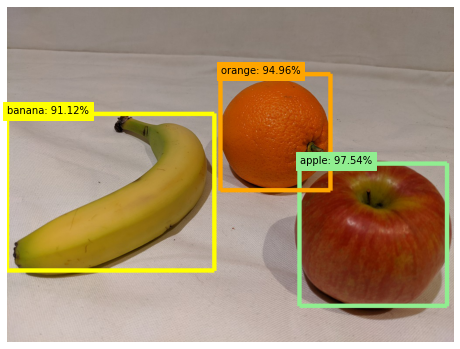

In [2]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
%matplotlib inline

# Load a test image and get its dimensions
test_img_file = os.path.join('data', 'object-detection', 'produce.jpg')
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape
print(np.array(test_img).shape)

# Get a prediction client for the object detection model
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
predictor = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

print('Detecting objects in {} using model {} in project {}...'.format(test_img_file, model_name, project_id))

# open을 사용하면 close를 사용해서 닫아야 하지만 with를 사용하면 open만 써도 됨 
# test = open(test_img_file, mode = "rb")
# test.close()

# Detect objects in the test image
with open(test_img_file, mode="rb") as test_data:
    results = predictor.detect_image(project_id, model_name, test_data)

# Create a figure to display the results
fig = plt.figure(figsize=(8, 8))
# 축 제거
plt.axis('off')

# Display the image with boxes around each detected object
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/100)
object_colors = {
    "apple": "lightgreen",
    "banana": "yellow",
    "orange": "orange"
}
for prediction in results.predictions:
    print(results.predictions)
    color = 'white' # default for 'other' object tags
    if (prediction.probability*100) > 50:
        if prediction.tag_name in object_colors:
            color = object_colors[prediction.tag_name]
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(test_img)


감지된 개체와 각 예측의 가능성을 표시하는 최종 예측을 봅니다.